In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("agaricus-lepiota.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [3]:
df.columns = ["label", "cap_shape", "cap_surface", "cap_color", "bruises", "odor", "gill_attachment", "gill_spacing", "gill_size", "gill_color", "stalk_shape", "stalk_root", "stalk_surface_above_ring", "stalk_surface_below_ring", "stalk_color_above_ring", "stalk_color_below_ring", "veil_type", "veil_color", "ring_number", "ring_type", "spore_print_color", "population", "habitat"]

In [4]:
df.head()

,label,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


##### Change cell symbols into meaningful values.

In [5]:
def return_meaningful_label(row):
    if row == "p":
        return "poisonous"
    elif row == "e":
        return "eadible"

In [6]:
df["label"] = df["label"].apply(return_meaningful_label)

In [7]:
df["cap_shape"].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap_shape, dtype: int64

In [8]:
def return_meaningful_cap_shape(row):
    if row == "x":
        return "convex"
    elif row == "f":
        return "flat"
    elif row == "k":
        return "knobbed"
    elif row == "b":
        return "bell"
    elif row == "s":
        return "sunken"
    elif row == "c":
        return "conical"

In [9]:
df["cap_shape"] = df["cap_shape"].apply(return_meaningful_cap_shape)

In [10]:
def return_meanungrul_cap_surface(row):
    if row == "f":
        return "fibrous"
    elif row == "g":
        return "grooves"
    elif row == "y":
        return "scaly"
    elif row == "s":
        return "smooth"

df["cap_surface"] = df["cap_surface"].apply(return_meanungrul_cap_surface)

In [11]:
df["cap_color"]       = df["cap_color"].replace({"n": "brown", "b" : "buff", "c" : "cinnamon", "g" : "gray", "r" : "green", "p" : "pink", "u" : "purple", "e" : "red", "w" : "white", "y" : "yellow"})
df["bruises"]         = df["bruises"].replace({"t": 1, "f": 0})
df["odor"]            = df["odor"].replace({"a" : "almond", "l" : "anise", "c" : "creosote", "y" : "fishy", "f" : "foul", "m" :  "musty", "n" : "none", "p" : "pungent", "s" : "spicy"})
df["gill_attachment"] = df["gill_attachment"].replace({"a" : "attached", "d": "descending", "f": "free", "n": "notched"})
df["gill_spacing"]    = df["gill_spacing"].replace({"c":"close", "w":"crowded", "d":"distant"})
df["gill_size"]       = df["gill_size"].replace({"b":"broad", "n":"narrow"})
df["gill_color"]      = df["gill_color"].replace({"k": "balck", "n":"brown", "b":"buff", "h":"chocolate", "g":"gray", "r":"green", "o":"orange", "p": "pink", "u": "purple", "e":"red", "w":"white", "y":"yellow"})
df["stalk_shape"]     = df["stalk_shape"].replace({"e": "enlarging", "t":"tapering"})
df["stalk_root"]      = df["stalk_root"].replace({"b":"bulbous", "c":"club", "u":"cup", "e":"equal", "z":"rhizomorphs","r":"rooted","?": "no root"})
df["veil_type"]       = df["veil_type"].replace({"p": "partial", "u":"universal"})
df["veil_color"]      = df["veil_color"].replace({"n":"brown", "o":"orange", "w":"white", "y":"yellow"})
df["ring_number"]     = df["ring_number"].replace({"n": 0, "o": 1, "t": 2})
df["ring_type"]       = df["ring_type"].replace({"c":"cobwebby","e":"evanescent","f":"flaring","l":"large", "n": "none" ,"p" : "pendant", "s":"sheathing", "z":"zone"})
df["population"]      = df["population"].replace({"a":"abundant","c":"clustered","n":"numerous", "s":"scattered","v":"several","y":"solitary"})
df["habitat"]         = df["habitat"].replace({"g":"grasses","l":"leaves","m":"meadows","p":"paths", "u":"urban","w":"wast","d":"woods"})
df["spore_print_color"]        = df["spore_print_color"].replace({"k":"black","n":"brown","b":"buff","h":"chocolate","r":"green", "o":"orange","u":"purple","w":"white","y":"yellow"})
df["stalk_surface_above_ring"] = df["stalk_surface_above_ring"].replace({"f" : "fibrous","y": "scaly", "k" : "silky", "s": "smooth"})
df["stalk_surface_below_ring"] = df["stalk_surface_below_ring"].replace({"f" : "fibrous","y": "scaly", "k" : "silky", "s": "smooth"})
df["stalk_color_above_ring"]   = df["stalk_color_above_ring"].replace({"n" : "brown", "b":"buff","c":"cinnamon","g":"gray","o":"orange", "p":"pink","e": "red","w":"white","y":"yellow"})
df["stalk_color_below_ring"]   = df["stalk_color_below_ring"].replace({"n" : "brown", "b":"buff","c":"cinnamon","g":"gray","o":"orange", "p":"pink","e": "red","w":"white","y":"yellow"})



In [12]:
def check_if_values_swapped_correctly():
    for col in df.columns:
        print()
        print("-----------------------------")
        print(col)
        print()
        print(df[col].value_counts())

In [13]:
# check_if_values_swapped_correctly()

In [92]:
df.head()

,label,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,poisonous,convex,smooth,brown,1,pungent,free,close,narrow,balck,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
1,eadible,convex,smooth,yellow,1,almond,free,close,broad,balck,...,smooth,white,white,partial,white,1,pendant,brown,numerous,grasses
2,eadible,bell,smooth,white,1,anise,free,close,broad,brown,...,smooth,white,white,partial,white,1,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,1,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
4,eadible,convex,smooth,gray,0,none,free,crowded,broad,balck,...,smooth,white,white,partial,white,1,evanescent,brown,abundant,grasses


##### Check for null values.

In [14]:
df.isnull().sum()

label                       0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64

##### Hypothesis testing

In [26]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [39]:
# label vs cap_shape
pd.crosstab(df.cap_shape, df.label)

label,eadible,poisonous
cap_shape,,
bell,404,48
conical,0,4
convex,1948,1708
flat,1596,1556
knobbed,228,600
sunken,32,0


**With 95% confidence level.**

H0: There is NO significant  difference between label and selected column - **columns are independent**. <br>
H1: There is a significant difference - **columns are dependent**.

In [90]:
def get_significant_columns():
    important_columns = {}
    for col in df.columns:
        if df[col].dtype == "O":
            data = pd.crosstab(df[col], df["label"])

            # Chi-square test of independence.
            statistic, p, dof, expected = chi2_contingency(data)
            critical_value = chi2.isf(0.05, len(data) - 1)
            
            if statistic >= critical_value:
                important_columns[col] = p
    
    return sorted(important_columns.items(), key=lambda x: x[1])
    # return important_columns

    # https://analyticsindiamag.com/how-to-use-the-chi-square-test-for-two-categorical-variables/


In [91]:
significant_columns = get_significant_columns()
significant_columns

[('label', 0.0),
 ('odor', 0.0),
 ('gill_size', 0.0),
 ('gill_color', 0.0),
 ('stalk_surface_above_ring', 0.0),
 ('stalk_surface_below_ring', 0.0),
 ('stalk_color_above_ring', 0.0),
 ('stalk_color_below_ring', 0.0),
 ('ring_type', 0.0),
 ('spore_print_color', 0.0),
 ('population', 0.0),
 ('habitat', 0.0),
 ('stalk_root', 7.702047904943513e-290),
 ('gill_spacing', 5.0229776137324786e-216),
 ('cap_shape', 1.196456568593578e-103),
 ('cap_color', 6.055814598336574e-78),
 ('cap_surface', 5.518427038649143e-68),
 ('veil_color', 3.320972749169678e-41),
 ('gill_attachment', 5.501707411861009e-31),
 ('stalk_shape', 4.604746212155192e-20)]

##### Visualizations

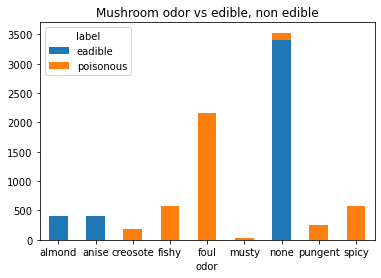

In [73]:
pd.crosstab(df.odor, df.label).plot(kind="bar", stacked=True, rot=0)
plt.title("Mushroom odor vs edible, non edible")
plt.show()

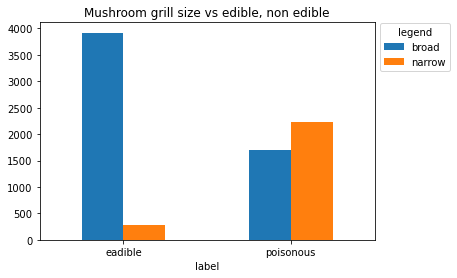

In [82]:
pltt = pd.crosstab(df.label, df.gill_size).plot(kind='bar', rot=0)
pltt.legend(title='legend', bbox_to_anchor=(1, 1.02),
         loc='upper left')
plt.title("Mushroom grill size vs edible, non edible")
plt.show()

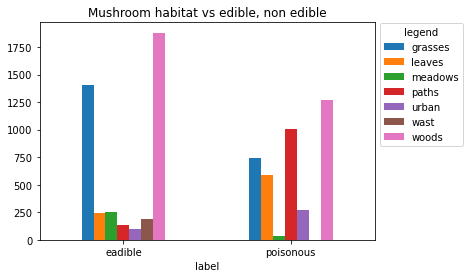

In [81]:
pltt = pd.crosstab(df.label, df.habitat).plot(kind='bar', rot=0)
pltt.legend(title='legend', bbox_to_anchor=(1, 1.02),
         loc='upper left')
plt.title("Mushroom habitat vs edible, non edible")
plt.show()

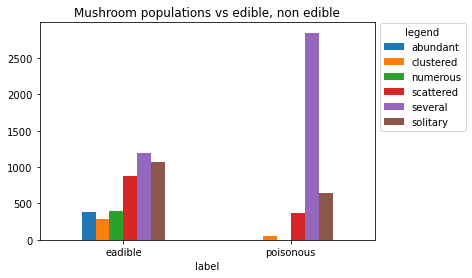

In [83]:
pltt = pd.crosstab(df.label, df.population).plot(kind='bar', rot=0)
pltt.legend(title='legend', bbox_to_anchor=(1, 1.02),
         loc='upper left')
plt.title("Mushroom populations vs edible, non edible")
plt.show()

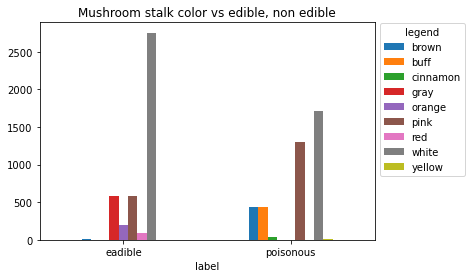

In [86]:
pltt = pd.crosstab(df.label, df.stalk_color_above_ring).plot(kind='bar', rot=0)
pltt.legend(title='legend', bbox_to_anchor=(1, 1.02),
         loc='upper left')
plt.title("Mushroom stalk color vs edible, non edible")
plt.show()

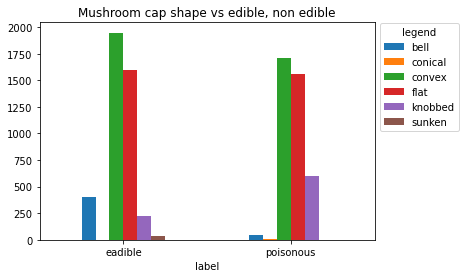

In [87]:
pltt = pd.crosstab(df.label, df.cap_shape).plot(kind='bar', rot=0)
pltt.legend(title='legend', bbox_to_anchor=(1, 1.02),
         loc='upper left')
plt.title("Mushroom cap shape vs edible, non edible")
plt.show()

### Predictive Model

In [94]:
df.head()

,label,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,poisonous,convex,smooth,brown,1,pungent,free,close,narrow,balck,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
1,eadible,convex,smooth,yellow,1,almond,free,close,broad,balck,...,smooth,white,white,partial,white,1,pendant,brown,numerous,grasses
2,eadible,bell,smooth,white,1,anise,free,close,broad,brown,...,smooth,white,white,partial,white,1,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,1,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
4,eadible,convex,smooth,gray,0,none,free,crowded,broad,balck,...,smooth,white,white,partial,white,1,evanescent,brown,abundant,grasses


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   label                     8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   int64 
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                8124 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

In [95]:
X = df.drop("label", axis=1)
y = df["label"]

In [99]:
X = pd.get_dummies(X, drop_first=True)

In [100]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 94 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   bruises                          8124 non-null   int64
 1   ring_number                      8124 non-null   int64
 2   cap_shape_conical                8124 non-null   uint8
 3   cap_shape_convex                 8124 non-null   uint8
 4   cap_shape_flat                   8124 non-null   uint8
 5   cap_shape_knobbed                8124 non-null   uint8
 6   cap_shape_sunken                 8124 non-null   uint8
 7   cap_surface_grooves              8124 non-null   uint8
 8   cap_surface_scaly                8124 non-null   uint8
 9   cap_surface_smooth               8124 non-null   uint8
 10  cap_color_buff                   8124 non-null   uint8
 11  cap_color_cinnamon               8124 non-null   uint8
 12  cap_color_gray                   8124 non-null  

<AxesSubplot:xlabel='label', ylabel='count'>

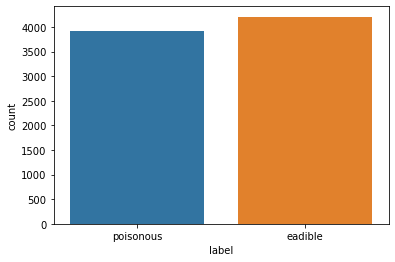

In [108]:
sns.countplot(data=df, x="label")

In [110]:
from sklearn.model_selection import train_test_split


In [106]:
X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, random_state=101, test_size=0.3)
X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER, y_OTHER, random_state=101, test_size=0.5)

#### 1. Logistic Regression

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [116]:
lr = LogisticRegression()
param_grid = {"penalty": ["l2"], "C": [0.01, 0.1, 0.3, 0.5, 0.9], "solver" : ["lbfgs", "liblinear", "newton-cg"]}
grid_lr = GridSearchCV(lr, param_grid)
grid_lr.fit(X_train, y_train)
grid_lr.best_params_

{'C': 0.5, 'penalty': 'l2', 'solver': 'lbfgs'}

In [119]:
def print_accuracy(model):
    print(f"Test Accuracy: {round(model.score(X_eval,y_eval)*100,2)}%")


In [120]:
print_accuracy(grid_lr)

Test Accuracy: 99.84%


c:\Users\Katarzyna Knapik\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


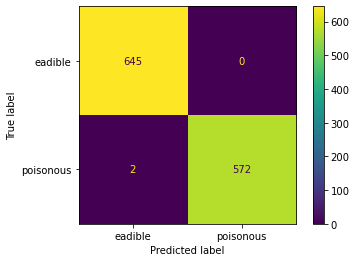

In [121]:
plot_confusion_matrix(grid_lr, X_eval, y_eval)

There is small Type 2 error here, because machine predicted that two mushrooms are eadible, however, they are poisonus.

#### Support Vector Classifier

In [122]:
from sklearn.svm import SVC

In [123]:
svm = SVC()
param_grid = {"C": [0.01, 0.1, 0.3, 0.5, 1, 1.1], "kernel" : ["linear", "rbf", "sigmoid"], "gamma": ["scale", "auto", 0.1, 0.2]}
svm_grid = GridSearchCV(svm, param_grid)
svm_grid.fit(X_train, y_train)
svm_grid.best_params_

{'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}

In [124]:
print_accuracy(svm_grid)

Test Accuracy: 100.0%


c:\Users\Katarzyna Knapik\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


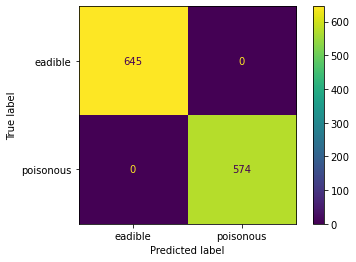

In [126]:
plot_confusion_matrix(svm_grid, X_eval, y_eval)

Perfect split.

#### Random Forest

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
rfc = RandomForestClassifier()
param_grid= {  "n_estimators": [50, 64, 70, 80, 100],
                "max_features": [4, 5, 7, 10],
                "criterion": ["gini", "entropy"],
                "bootstrap": [True, False],
                "oob_score": [False] 
            }
rfc_grid = GridSearchCV(rfc, param_grid)
rfc_grid.fit(X_train, y_train)
rfc_grid.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_features': 4,
 'n_estimators': 64,
 'oob_score': False}

In [134]:
print_accuracy(rfc_grid)

Test Accuracy: 100.0%


c:\Users\Katarzyna Knapik\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


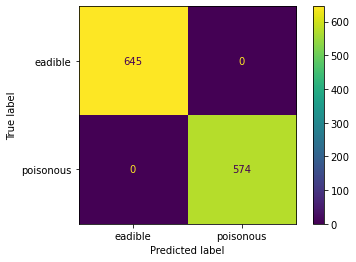

In [135]:
plot_confusion_matrix(rfc_grid, X_eval, y_eval)

Perfect split.

In [136]:
final_prediction = rfc_grid.predict(X_test)

In [137]:
print(classification_report(y_test, final_prediction))

              precision    recall  f1-score   support

     eadible       1.00      1.00      1.00       629
   poisonous       1.00      1.00      1.00       590

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219

